In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df_test = pd.read_csv('../data/annotation/test_annotation.csv').drop(columns = 'Unnamed: 0')
df_train = pd.read_csv('../data/annotation/train_annotation.csv').drop(columns = 'Unnamed: 0')

In [20]:
df_train.head()

,Filename,Annotation tag,Upper left corner X,Upper left corner Y,Lower right corner X,Lower right corner Y,Origin file,Origin frame number,Origin track,Origin track frame number
0,dayTraining/dayClip1--00000.jpg,go,698,333,710,358,dayTraining/dayClip1/dayClip1Shutter0.000800-G...,0,dayTraining/dayClip1/dayClip1Shutter0.000800-G...,0
1,dayTraining/dayClip1--00000.jpg,go,846,391,858,411,dayTraining/dayClip1/dayClip1Shutter0.000800-G...,0,dayTraining/dayClip1/dayClip1Shutter0.000800-G...,0
2,dayTraining/dayClip1--00001.jpg,go,698,337,710,357,dayTraining/dayClip1/dayClip1Shutter0.000800-G...,1,dayTraining/dayClip1/dayClip1Shutter0.000800-G...,1
3,dayTraining/dayClip1--00001.jpg,go,847,390,859,410,dayTraining/dayClip1/dayClip1Shutter0.000800-G...,1,dayTraining/dayClip1/dayClip1Shutter0.000800-G...,1
4,dayTraining/dayClip1--00002.jpg,go,698,331,710,356,dayTraining/dayClip1/dayClip1Shutter0.000800-G...,2,dayTraining/dayClip1/dayClip1Shutter0.000800-G...,2


In [21]:
df_train['images'] = df_train['Filename'].apply(lambda x: x.split('/')[1])
df_test['images'] = df_test['Filename'].apply(lambda x: x.split('/')[1])

In [22]:
df_train['image_flow'] = df_train['Annotation tag'] + '/' + df_train['images']
df_test['image_flow'] = df_test['Annotation tag'] + '/' + df_test['images']

In [23]:
df_test.drop(df_test.loc[df_test['Annotation tag'] == 'goForward'].index, inplace = True)

In [24]:
df_train['Annotation tag'].value_counts(normalize = True).index

Index(['go', 'stop', 'stopLeft', 'warning', 'goLeft', 'warningLeft'], dtype='object')

''

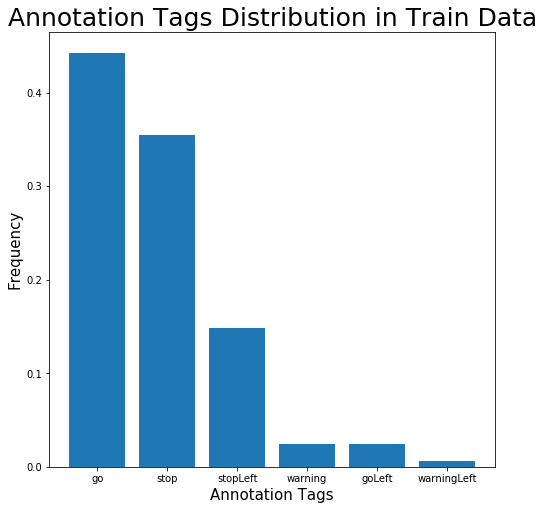

In [30]:
plt.figure(figsize = (8,8))
plt.bar(df_train['Annotation tag'].value_counts(normalize = True).index,
        df_train['Annotation tag'].value_counts(normalize = True))
plt.xlabel('Annotation Tags', size = 15)
plt.ylabel('Frequency', size = 15)
plt.title('Annotation Tags Distribution in Train Data', size = 25)
;

''

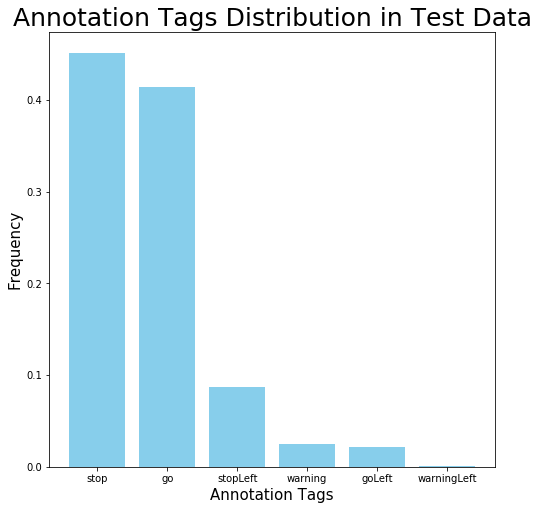

In [34]:
plt.figure(figsize = (8,8))
plt.bar(df_test['Annotation tag'].value_counts(normalize = True).index,
        df_test['Annotation tag'].value_counts(normalize = True), color = 'skyblue')
plt.xlabel('Annotation Tags', size = 15)
plt.ylabel('Frequency', size = 15)
plt.title('Annotation Tags Distribution in Test Data', size = 25)
;